In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import tensorflow as tf
import keras
import sklearn
import pandas as pd
import numpy as np
print("TensorFlow:", tf.__version__)
print("Keras:", keras.__version__)
print("scikit-learn:", sklearn.__version__)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)

TensorFlow: 2.18.0
Keras: 3.8.0
scikit-learn: 1.6.1
Pandas: 2.2.2
NumPy: 2.0.2


In [ ]:
df = pd.read_csv('/0941.HKHKD_Candlestick_1_s_BID_16.06.2025-16.06.2025.csv')

In [ ]:
print(df.head())

                  Gmt time    Open    High     Low   Close  Volume
0  16.06.2025 01:30:01.000  87.545  87.545  87.545  87.545   0.012
1  16.06.2025 01:30:03.000  87.595  87.646  87.595  87.646   0.024
2  16.06.2025 01:30:04.000  87.646  87.646  87.646  87.646   0.012
3  16.06.2025 01:30:05.000  87.645  87.645  87.645  87.645   0.012
4  16.06.2025 01:30:06.000  87.595  87.645  87.595  87.645   0.024


In [ ]:
df1=df.reset_index()['Close']
df1.head()

,Close
0,87.545
1,87.646
2,87.646
3,87.645
4,87.645


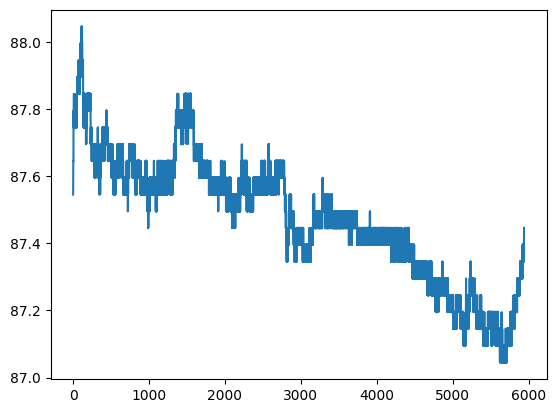

In [ ]:
plt.plot(df1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.4995005 ]
 [0.6003996 ]
 [0.6003996 ]
 ...
 [0.35064935]
 [0.34965035]
 [0.4005994 ]]


In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size


(3861, 2080)

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 25
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)


(3835, 25)
(3835,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(25,1)))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 25, 25)         │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 25, 25)         │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 25)             │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,926 (50.49 KB)

 Trainable params: 12,926 (50.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=60,batch_size=64,verbose=1)


Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0790 - val_loss: 0.0154
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 8/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 9/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 10/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 11/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 12/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

87.04744948968644

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

87.06605723879817

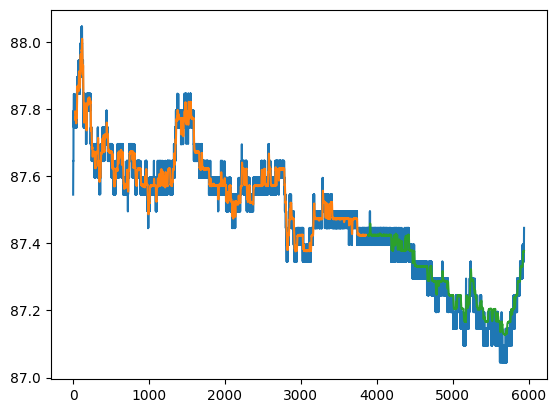

In [ ]:
look_back=25
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
start = len(train_predict) + (look_back * 2) + 1
end = start + len(test_predict)
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
start = len(train_predict) + (look_back * 2) + 1
end = min(start + len(test_predict), testPredictPlot.shape[0])
testPredictPlot[start:end, :] = test_predict[:end - start]
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

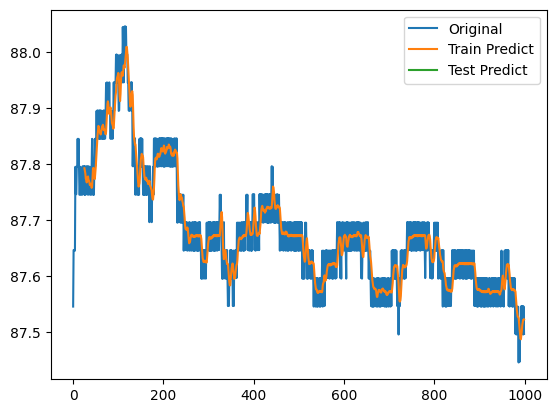

In [ ]:
plt.plot(scaler.inverse_transform(df1)[:1000], label="Original")
plt.plot(trainPredictPlot[:1000], label="Train Predict")
plt.plot(testPredictPlot[:1000], label="Test Predict")
plt.legend()
plt.show()


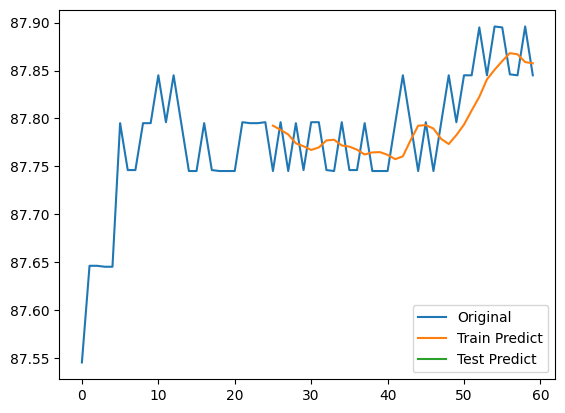

In [ ]:
plt.plot(scaler.inverse_transform(df1)[:60], label="Original")
plt.plot(trainPredictPlot[:60], label="Train Predict")
plt.plot(testPredictPlot[:60], label="Test Predict")
plt.legend()
plt.show()


array([[87.42399],
       [87.42526],
       [87.42425],
       ...,
       [87.37694],
       [87.37624],
       [87.37754]], dtype=float32)

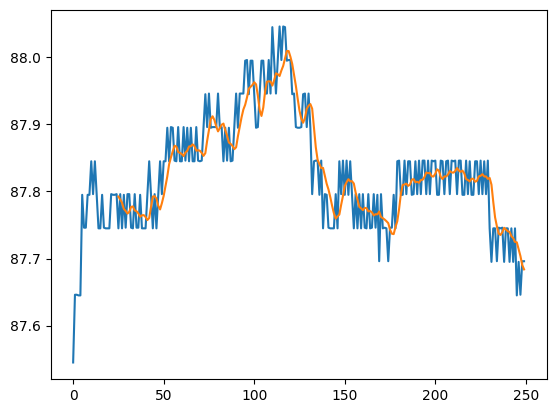